In [1]:
import torch

In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import re
import os

In [3]:
df = pd.read_json('CUAD_v1/CUAD_v1.json')

In [4]:
TXT_FILES_PATH = 'CUAD_v1/full_contract_txt/'
txt_files = os.listdir(TXT_FILES_PATH)
print(len(txt_files))
txt_files[0]

510


'2ThemartComInc_19990826_10-12G_EX-10.10_6700288_EX-10.10_Co-Branding Agreement_ Agency Agreement.txt'

In [5]:
txt_content = [
    open(TXT_FILES_PATH + txt_file, 'r').read()
    for txt_file in txt_files
]

In [6]:
print(txt_content[0])

CO-BRANDING AND ADVERTISING AGREEMENT

THIS CO-BRANDING AND ADVERTISING AGREEMENT (the "Agreement") is made as of June 21, 1999 (the "Effective Date") by and between I-ESCROW, INC., with its principal place of business at 1730 S. Amphlett Blvd., Suite 233, San Mateo, California 94402 ("i-Escrow"), and 2THEMART.COM, INC. having its principal place of business at 18301 Von Karman Avenue, 7th Floor, Irvine, California 92612 ("2TheMart").

1. DEFINITIONS.

(a) "CONTENT" means all content or information, in any medium, provided by a party to the other party for use in conjunction with the performance of its obligations hereunder, including without limitation any text, music, sound, photographs, video, graphics, data or software. Content provided by 2TheMart is referred to herein as "2TheMart Content" and Content provided by i-Escrow is referred to herein as "i-Escrow Content."

(b) "CO-BRANDED SITE" means the web-site accessible through Domain Name, for the Services implemented by i-Escrow.

In [13]:
model_name = "nomic-ai/nomic-embed-text-v1.5"
# model_name = "BAAI/bge-m3"
tokenizer = AutoTokenizer.from_pretrained(model_name)

100%|██████████| 510/510 [00:15<00:00, 32.38it/s]


Min tokens: 174
Max tokens: 78593
Mean tokens: 10843.482352941177
Median tokens: 6738.5


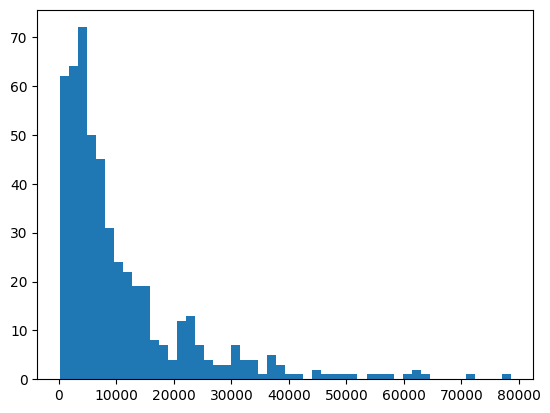

In [14]:
n_tokens = np.array([len(tokenizer.encode(txt)) for txt in tqdm(txt_content)])

print(f"Min tokens: {n_tokens.min()}")
print(f"Max tokens: {n_tokens.max()}")
print(f"Mean tokens: {n_tokens.mean()}")
print(f"Median tokens: {np.median(n_tokens)}")

plt.hist(n_tokens, bins=50)
plt.show()

## Trimming

In [15]:
def trim_text(text):
    """
    Remove contigous whitespaces/tabs and newlines with a single whitespace and newline respectively.
    """
    text = re.sub(r'[ \t]+', ' ', text)
    text = re.sub(r'\n+', '\n', text)
    return text

s = 'Hello    \nWorld'
trim_text(s)

'Hello \nWorld'

In [16]:
# for i in range(len(txt_content)):
#     diff = len(tokenizer.encode(txt_content[i])) - len(tokenizer.encode(trim_text(txt_content[i])))
#     if diff > 0:
#         print(i)

In [17]:
txt_content_trimmed = [trim_text(txt) for txt in txt_content]
print(txt_content_trimmed[0])

CO-BRANDING AND ADVERTISING AGREEMENT
THIS CO-BRANDING AND ADVERTISING AGREEMENT (the "Agreement") is made as of June 21, 1999 (the "Effective Date") by and between I-ESCROW, INC., with its principal place of business at 1730 S. Amphlett Blvd., Suite 233, San Mateo, California 94402 ("i-Escrow"), and 2THEMART.COM, INC. having its principal place of business at 18301 Von Karman Avenue, 7th Floor, Irvine, California 92612 ("2TheMart").
1. DEFINITIONS.
(a) "CONTENT" means all content or information, in any medium, provided by a party to the other party for use in conjunction with the performance of its obligations hereunder, including without limitation any text, music, sound, photographs, video, graphics, data or software. Content provided by 2TheMart is referred to herein as "2TheMart Content" and Content provided by i-Escrow is referred to herein as "i-Escrow Content."
(b) "CO-BRANDED SITE" means the web-site accessible through Domain Name, for the Services implemented by i-Escrow. The

100%|██████████| 510/510 [00:14<00:00, 34.92it/s]


Min tokens: 174
Max tokens: 78593
Mean tokens: 10843.482352941177
Median tokens: 6738.5


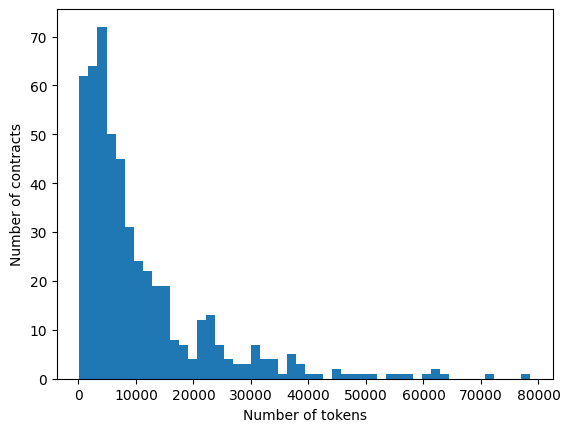

In [19]:
n_tokens_new = np.array([len(tokenizer.encode(txt)) for txt in tqdm(txt_content_trimmed)])

print(f"Min tokens: {n_tokens_new.min()}")
print(f"Max tokens: {n_tokens_new.max()}")
print(f"Mean tokens: {n_tokens_new.mean()}")
print(f"Median tokens: {np.median(n_tokens_new)}")

plt.hist(n_tokens_new, bins=50)
plt.xlabel('Number of tokens')
plt.ylabel('Number of contracts')
plt.show()